#Abstracto

El mercado de motos en Colombia sigue en crecimiento a pesar de la desaceleración mundial.

La competencia cada vez se intensifica, y por eso se requiere que las marcas tomen acciones cada vez más informadas y certeras para optimizar sus recursos de inversion.

En este contexto, se presenta un dataset con información relevante del mercado de motocicletas en Colombia para el año 2023. El dataset contiene información sobre los volumenes de matriculas (registros publicos) de cada marca y por cada modelo, junto con una descripcion geografica que permite identificar donde se vendio, que producto y en que cantidad dia a dia.

Utilizando esta información, ¿es posible encontrar oportunidades para las ensambladoras de motos y generar recomendaciones que permitan optimizar recursos de inversion y alcanzar objetivos comerciales?.

En resumen, este estudio ofrece una valiosa perspectiva sobre el mercado de motocicletas en Colombia y proporciona información útil para las marcas que requieren tomar decisiones informadas y estratégicas.

#Objetivo

Identificar oportunidades para las ensambladoras de motos y generar recomendaciones que permitan optimizar recursos de inversion y alcanzar objetivos comerciales. 



##Preguntas hipotesis

Primera hipotesis

H0: Las vendas de motos se dan todos los dias por igual

H1: Existen dias con mas ventas que otros

Segunda hipotesis

H0: Las vendas de motos se dan en unos lugares muy especificos

H1: Las ventas de motos estan muy dispersas por todo el pais

## Preguntas de interes

A continuación planteo algunas preguntas de interés adicinales para el proyecto: 

- Es posible predecir el comportamiento de las ventas del mercado, y de alguna marca en particular ?

- ¿Existe correlacion entre la cantidad de ciudades en las principales ciudades de una marca y las ventas?

#Contexto comercial

Por regla todos los vehiculos de Colombia deben estar registrados ante el ministerio de transporte, ese proceso se conoce como la matriculacion de un vehiculo, que basicamente consiste en asignar una placa para poder movilizarse por el territorio nacional. La ANDI (asociacion nacional de industriales) lleva un registro diario de las matriculas que se generan todos los dias en el pais, y esa informacion esta disponible para las personas que deseen adquirirla. 

para lograr el objetivo propuesto se relaizara un analisis de las matriculas, que estan directamente relacionadas con las ventas. Primero se va a realizar un analisis a nivel temporal (en que fechas se matricula mas) y luego se realizara un analisis mas detallado, a nivel general, por segmentos, por marcas y a nivel geografico que permita determinar las fechas y lugares del pais mas estrategicos para tomar acciones, dado el exito de algunas marcas en sus respectivos segmentos. 

#Problema comercial

a continuacion se plantean algunas preguntas de interes para resolver desde la perspectiva de una marca de motos: 

- Existe alguna fecha donde se registren mas motocicletas?

- Existe preferencia por alguna o algunas marcas mas que por otras?

- LAs marcas matriculan todos los dias del mes por igual?

- Existe alguna relacion entre las ventas de una marca, los segmentos en donde participa y las ciudades principales?


# Contexto analitico

Se proporcionan dos datasets de excel, cada uno con 24 columnas que incluyen la fecha de la matricula, la marca comercial, la linea, la ciudad de residencia del propietario y los segmentos a los que pertenece la motocicleta, entre otros. Se tiene disponible informacion desde el 2016 pero se va a trabajar con el 2023 principalmente para tener un panorama mas actual del mercado.

In [52]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from numpy import arange
%cd '/content/drive/MyDrive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [53]:
import json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy
import missingno as msno

## Bases de datos

In [54]:
# Base de daros de la indstria de motos Colombianas del 2023
co_data_23 = pd.read_excel('base Runt 2023.xlsx', sheet_name='Sheet1')
co23 = pd.DataFrame(co_data_23)

# Base de daros de la indstria de motos Colombianas del 2022
co_data_22 = pd.read_excel('base Runt 2022.xlsx', sheet_name='Hoja1')
co22 = pd.DataFrame(co_data_22)

# Base de daros de las exportaciones de motos Indias
exports_data = pd.read_excel('ClickExim_Export File _April23_FY24.xlsx', sheet_name='EXPORT (2)')
export = pd.DataFrame(exports_data)

# Exporatory data analysis 

In [56]:
print(co23.columns)
print(co22.columns)
print(export.columns)

Index(['AÑO MI', 'MES MI', 'DIA MI', 'MARCA', 'MARCA COMERCIAL', 'LINEA',
       'LINEA COMERCIAL', 'MODELO', 'COLOR', 'SEGMENTO COMERCIAL',
       'CILINDRAJE', 'CILINDRAJE RANGO', 'DEPARTAMENTO', 'MINICIPIO/CIUDAD',
       'NUEVAS ZONAS', 'COMBUSTIBLE ', 'PRENDA(SI/NO)',
       'CIUDAD RESIDENCIA PROPIETARIO', 'CIUDAD DE RESIDENCIA 2', 'MATRICULA',
       'Fecha'],
      dtype='object')
Index(['AÑO MI', 'MES MI', 'DIA MI', 'CLASE', 'MARCA', 'MARCA COMERCIAL',
       'LINEA', 'LINEA COMERCIAL', 'MODELO', 'COLOR', 'SEGMENTO COMERCIAL',
       'CILINDRAJE', 'CILINDRAJE RANGO', 'DEPARTAMENTO', 'MINICIPIO/CIUDAD',
       'MINICIPIO/CIUDAD2', 'NUEVAS ZONAS', 'COMBUSTIBLE ', 'PRENDA(SI/NO)',
       'CIUDAD RESIDENCIA PROPIETARIO', 'CIUDAD DE RESIDENCIA 2', 'MATRICULA',
       'Tipo de Usuario', 'SEGMENTACION DE PRECIO'],
      dtype='object')
Index(['Bill No', 'HS CODE(4 Disit)', 'Date', 'Month', 'Hs Code', 'OEM',
       'Model', 'CC', 'Segment', 'Product', 'Quantity', 'Unit', 'Gross Weight

# Data Wrangling

El primer paso sera unificar las bases en una sola. 

Para esto vamos a renombrar columnas para que las bases coincidan.
 

In [57]:
co22_23 = co23.merge(co22,'outer')

<ipython-input-57-b5322ead9232>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  co22_23 = co23.merge(co22,'outer')


entre las dos bases, hay 5 columnas que no coinciden. 

Nuestra decision con estas columnas sera eliminarlas ya que no aportan valor.

In [63]:
df1 = co22_23.drop(['COMBUSTIBLE ','PRENDA(SI/NO)','Fecha', 'CLASE','MINICIPIO/CIUDAD2', 'Tipo de Usuario', 'SEGMENTACION DE PRECIO','CILINDRAJE RANGO','CIUDAD DE RESIDENCIA 2'], axis=1)

In [64]:
df1.head()

,AÑO MI,MES MI,DIA MI,MARCA,MARCA COMERCIAL,LINEA,LINEA COMERCIAL,MODELO,COLOR,SEGMENTO COMERCIAL,CILINDRAJE,DEPARTAMENTO,MINICIPIO/CIUDAD,NUEVAS ZONAS,CIUDAD RESIDENCIA PROPIETARIO,MATRICULA
0,2023,1,31,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2023,MULTICOLOR,CUB,109.0,Valle del Cauca,FLORIDA,PACIFICO,CALI,1
1,2023,1,28,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2023,NEGRO NEBULOSA,CUB,109.0,Bolivar,CLEMENCIA,NORTE,ARJONA,1
2,2023,1,27,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2023,NEGRO MATE,CUB,109.0,Cauca,POPAYAN,PACIFICO,POPAYAN,1
3,2023,1,27,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2022,NEGRO MATE,CUB,109.0,Antioquia,LA ESTRELLA,ANTIOQUIA,MEDELLIN,1
4,2023,1,27,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2023,NEGRO NEBULOSA,CUB,109.0,Valle del Cauca,FLORIDA,PACIFICO,PALMIRA,1


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034632 entries, 0 to 1034631
Data columns (total 16 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   AÑO MI                         1034632 non-null  int64 
 1   MES MI                         1034632 non-null  int64 
 2   DIA MI                         1034632 non-null  int64 
 3   MARCA                          1034632 non-null  object
 4   MARCA COMERCIAL                1034632 non-null  object
 5   LINEA                          1034632 non-null  object
 6   LINEA COMERCIAL                1034632 non-null  object
 7   MODELO                         1034632 non-null  int64 
 8   COLOR                          1034632 non-null  object
 9   SEGMENTO COMERCIAL             1034632 non-null  object
 10  CILINDRAJE                     1034603 non-null  object
 11  DEPARTAMENTO                   1034632 non-null  object
 12  MINICIPIO/CIUDAD            

De acuerdo a esta informacion encontramos que el campo de cilindraje, combustible, prenda y ciudad propietario tiene campos nulos. 

<Axes: >

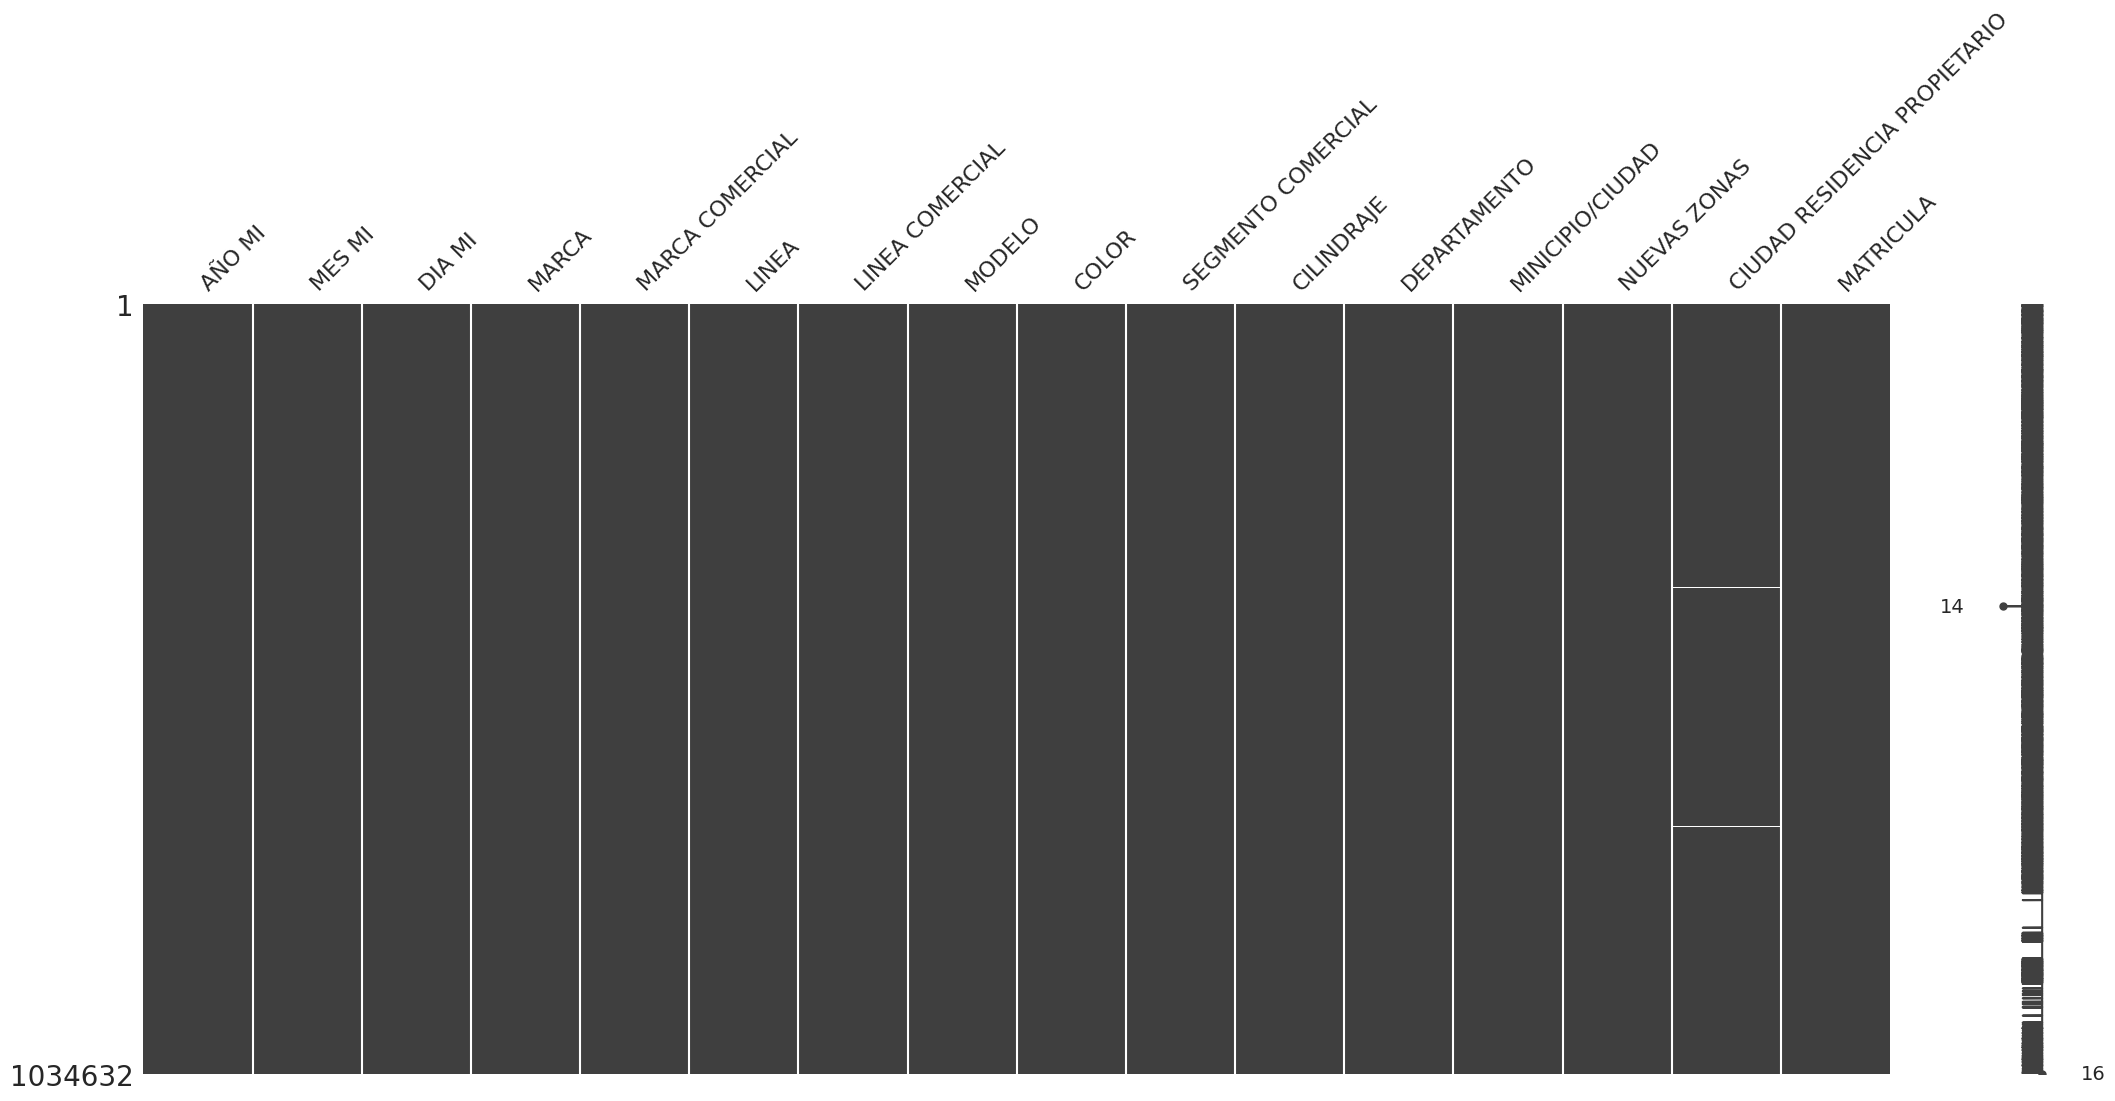

In [66]:
msno.matrix(df1)

De acuerdo a esta grafica se observa que hay pocos datos nulos, sin embargo el campo de 'ciudad de residencia propietario' es importante y no debe tener datos nulos para un analisis futuro, por eso vamos a realizar un tratamiento de datos. 

Para resolver este problema usaremos el campo 'municipio/ciudad'

In [67]:
df1['CIUDAD RESIDENCIA PROPIETARIO'].fillna(df1['MINICIPIO/CIUDAD'], inplace=True)

<Axes: >

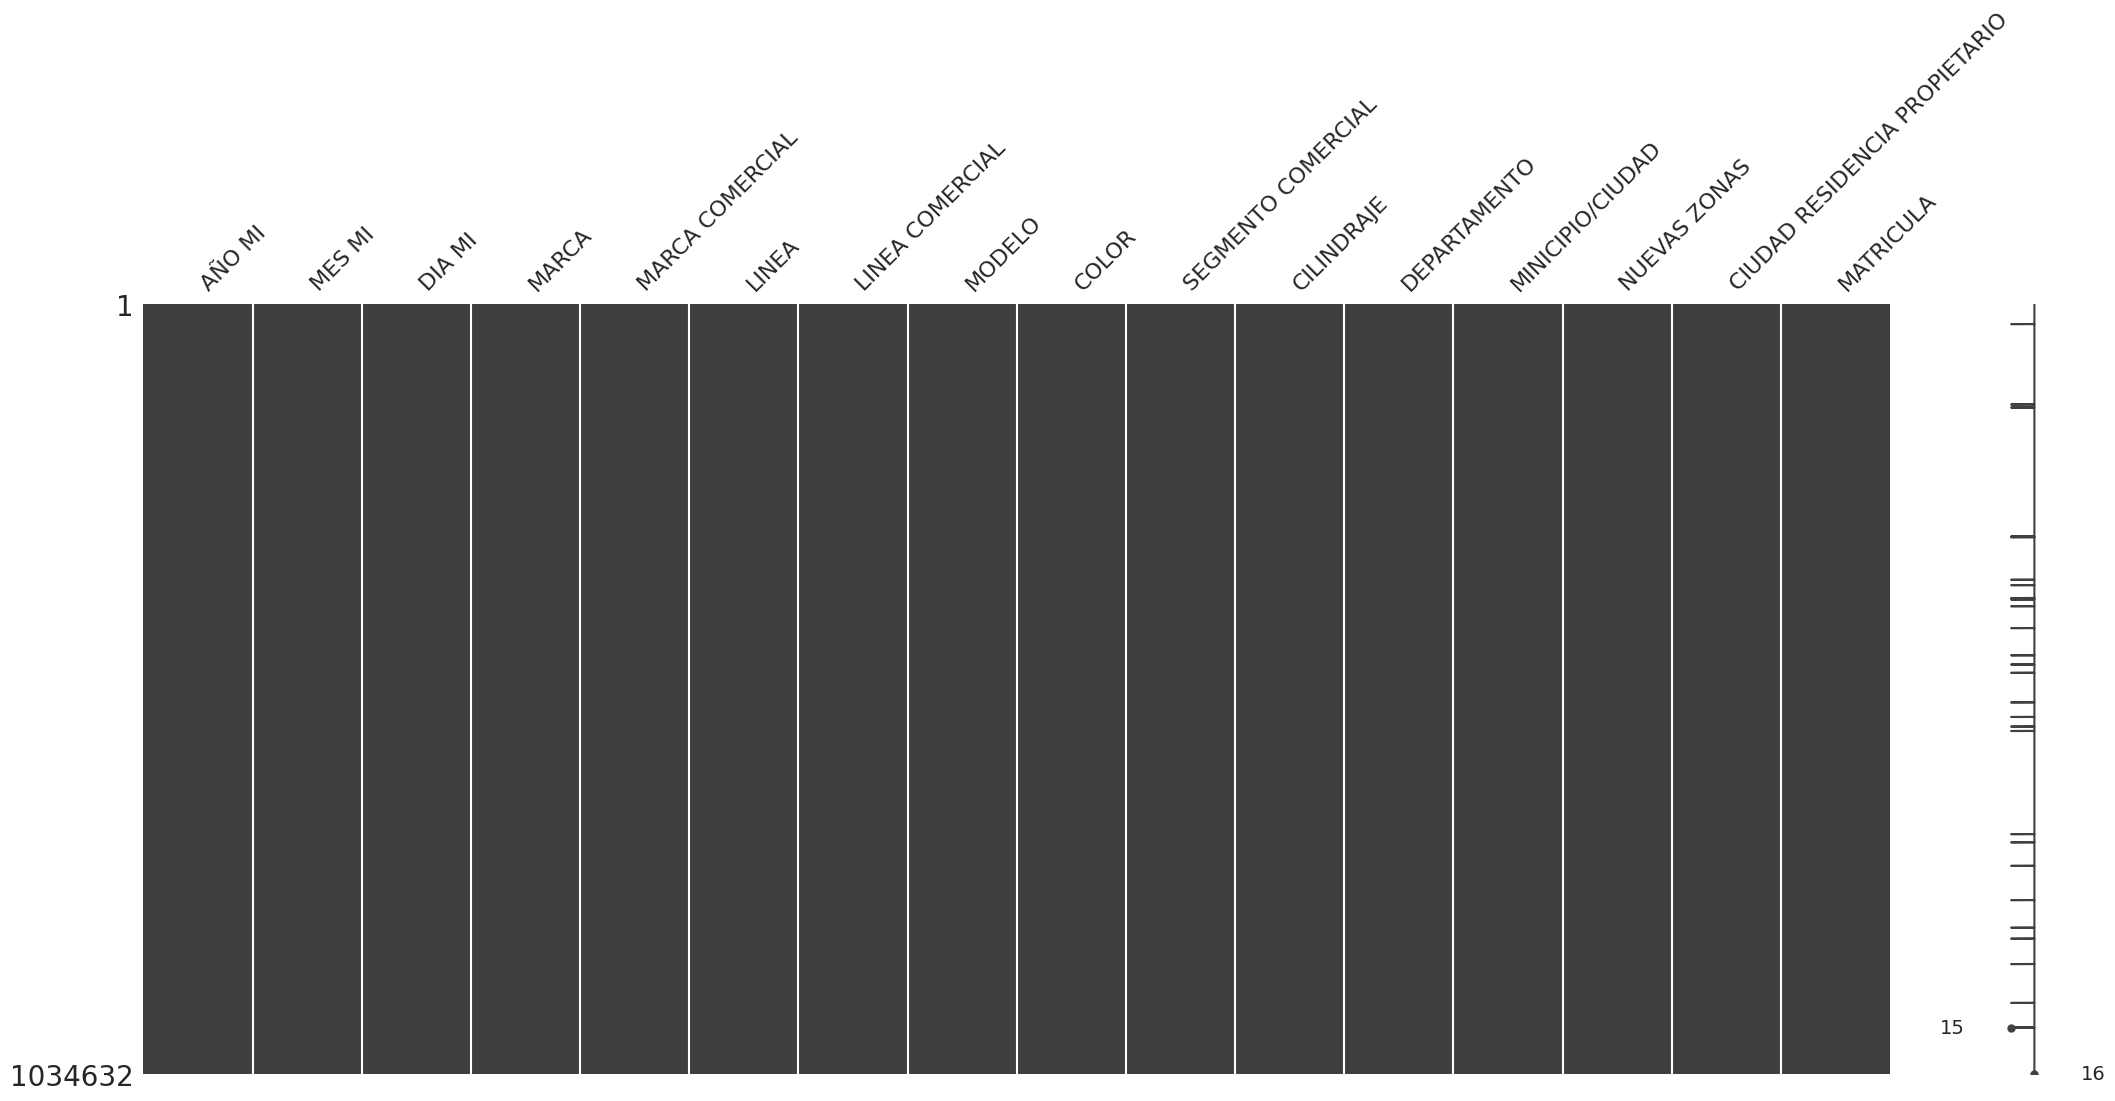

In [68]:
msno.matrix(df1)

In [69]:
export.head()

,Bill No,HS CODE(4 Disit),Date,Month,Hs Code,OEM,Model,CC,Segment,Product,...,Foreign Company,Foreign Address,Item No,Invoice No,INCOTERM,INVOICE VALUE,FREIGHT VALUE,INSURANCE VALUE,Exchange Rate,Remarks
0,9825824,8711,2021-04-01,2021-04-01,87112019,OTHER,OTHER,OTHER,OTHER,HONDA SCOOTER (COM. INV. NO.547-2016-01,...,SYAKAR TRADING COMPANY PVT. LTD.,NaN,1.0,4F2020760496,CIF,1917600.0,114180.0,2960.0,1.0,NaN
1,9810034,8711,2021-04-01,2021-04-01,87112019,HONDA,NAVI,110,SCOOTER,BRAND NEW SCOOTER IN CKD CONDITION-HONDASCOOTE...,...,HONDA DE MEXICO S.A. DE C.V.,NaN,1.0,120280325,FOB,44880.0,0.0,0.0,71.6,NaN
2,9815570,8711,2021-04-01,2021-04-01,87112029,BAJAJ,PULSAR 220F,220,BIKE,BAJAJ PULSAR 220 F ABS MOTORCYCLE IN CKDCONDIT...,...,HULAS AUTO CRAFT PRIVATE LIMITED,NaN,1.0,2020034436,CIF,4830080.0,125120.0,6400.0,1.0,NaN
3,9803748,8711,2021-04-01,2021-04-01,87112029,OTHER,OTHER,OTHER,OTHER,duty under the Central Excise Rules 2002 or a...,...,AUTECO S.A.S,DEPOSITO ADUANERO AUTECO S A S(T/E)ACCOUNT OF ...,8.0,5411991,FOB,97596.0,0.0,0.0,71.6,NaN
4,9820578,8711,2021-04-01,2021-04-01,87112029,OTHER,OTHER,OTHER,OTHER,duty under the Central Excise Rules 2002 or a...,...,DARKINEL S.A,"AVDA ITALIA 3982, CP 11.400, MONTEVIDEO URUGUA...",8.0,5411768,FOB,23040.0,0.0,0.0,71.6,NaN


In [70]:
export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245367 entries, 0 to 245366
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bill No                         245367 non-null  int64         
 1   HS CODE(4 Disit)                245367 non-null  int64         
 2   Date                            245367 non-null  datetime64[ns]
 3   Month                           245367 non-null  datetime64[ns]
 4   Hs Code                         245367 non-null  int64         
 5   OEM                             245366 non-null  object        
 6   Model                           245366 non-null  object        
 7   CC                              238042 non-null  object        
 8   Segment                         245242 non-null  object        
 9   Product                         245367 non-null  object        
 10  Quantity                        245348 non-null  float64

# Analisis de datos


##Analisis temporal del mercado

<Axes: xlabel='DIA MI', ylabel='MES MI'>

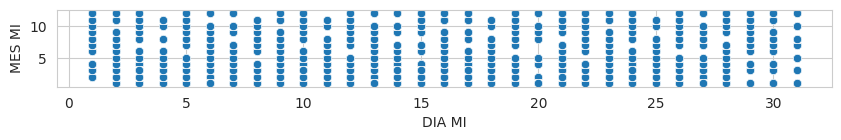

In [71]:
fig, ax = plt.subplots(figsize = (10, 1))
sns.scatterplot(data=df1, y="MES MI", x="DIA MI", ax = ax)

De acuerdo a rste primer grafico, no todos los dias se registran ventas de motos nuevas. Existen dias en que no se registra nada. Con la información disponible, es posible asumir que en los domingos y festivos no se registran ventas de motos. 

KeyError: ignored

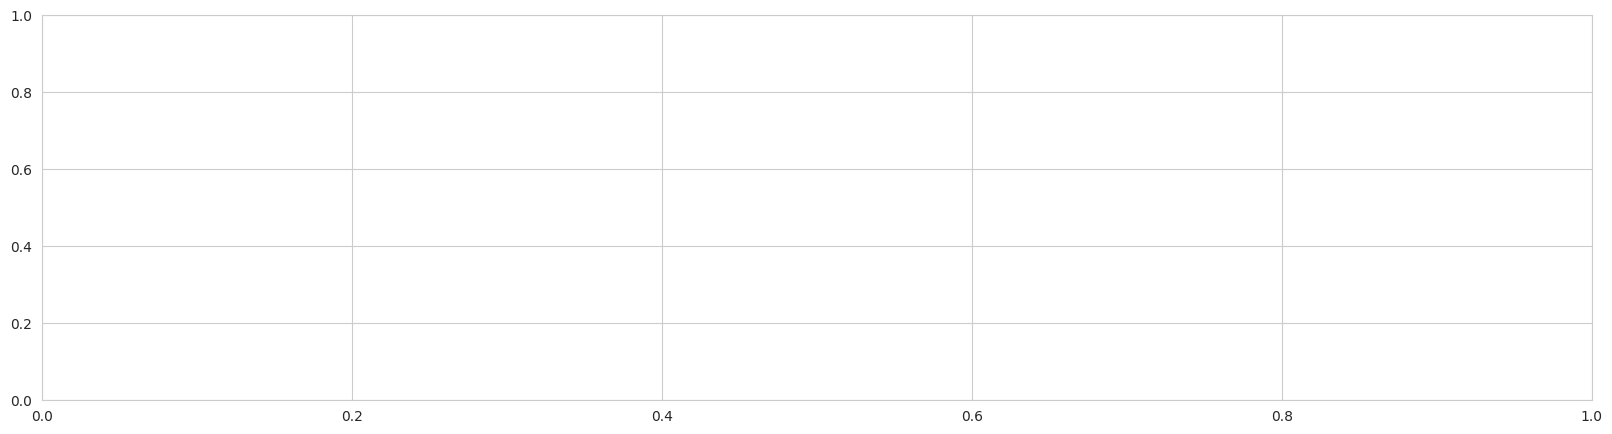

In [72]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria = df1.groupby('Fecha').count()['MATRICULA']
 
count_categoria.plot(ax = ax)
plt.show()

En este grafico se pueden observar las ventas totales de motos por dia.

 Si comparamos el comportamiento de los ultimos 10 dias del mes, se puede observar que en esos dias se vende más, pues tiene picos más altos en comparación a los primeros 20 dias del mes, por lo cual se le puede recomendar al equipo de ventas y marketing realizar acciones especificas para los 10 dias finales del mes.

En este punto se puede afirmar que la primera hipotesis nula es falsa, pues se aprecia una importante variacion entre los diferentes dias del mes 

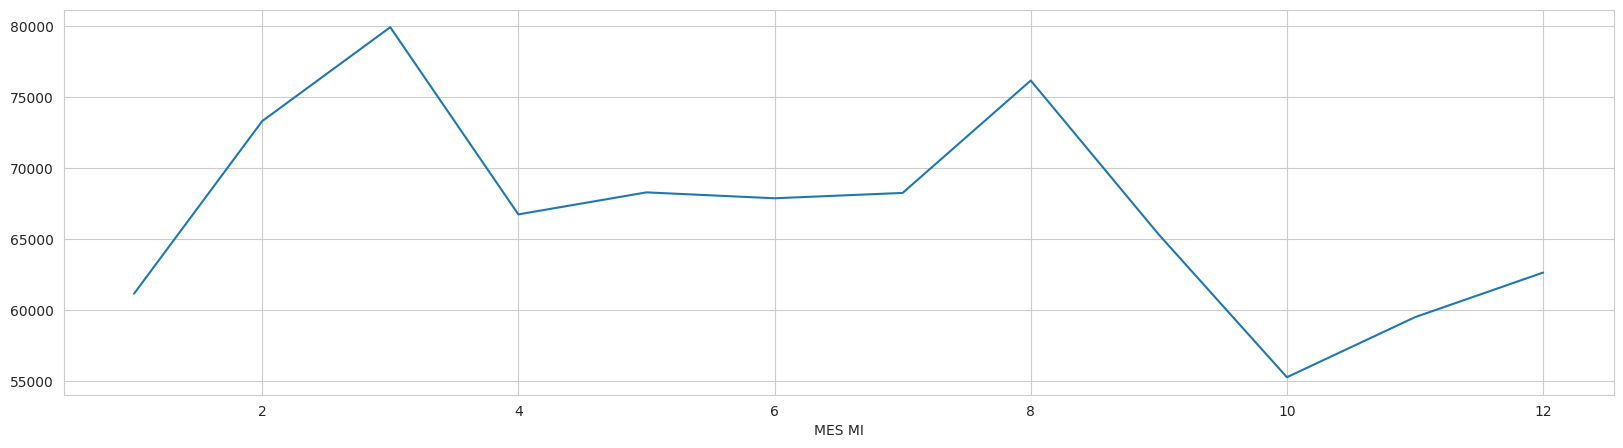

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria = co22.groupby('MES MI').count()['MATRICULA']
 
count_categoria.plot(ax = ax)
plt.show()

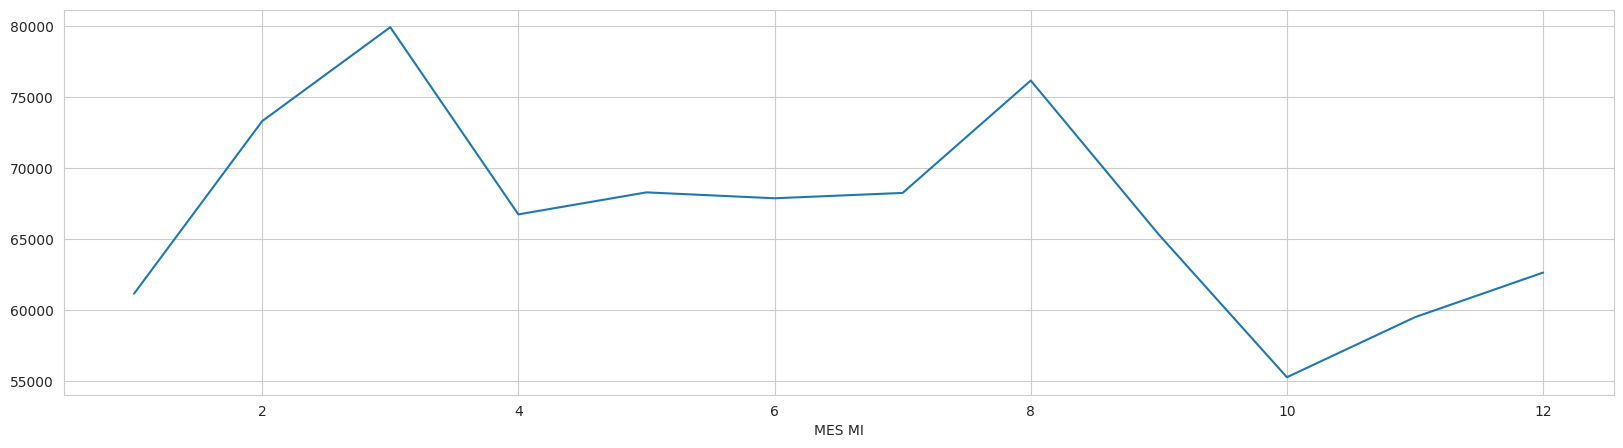

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria = co21.groupby('MES MI').count()['MATRICULA']
 
count_categoria.plot(ax = ax)
plt.show()

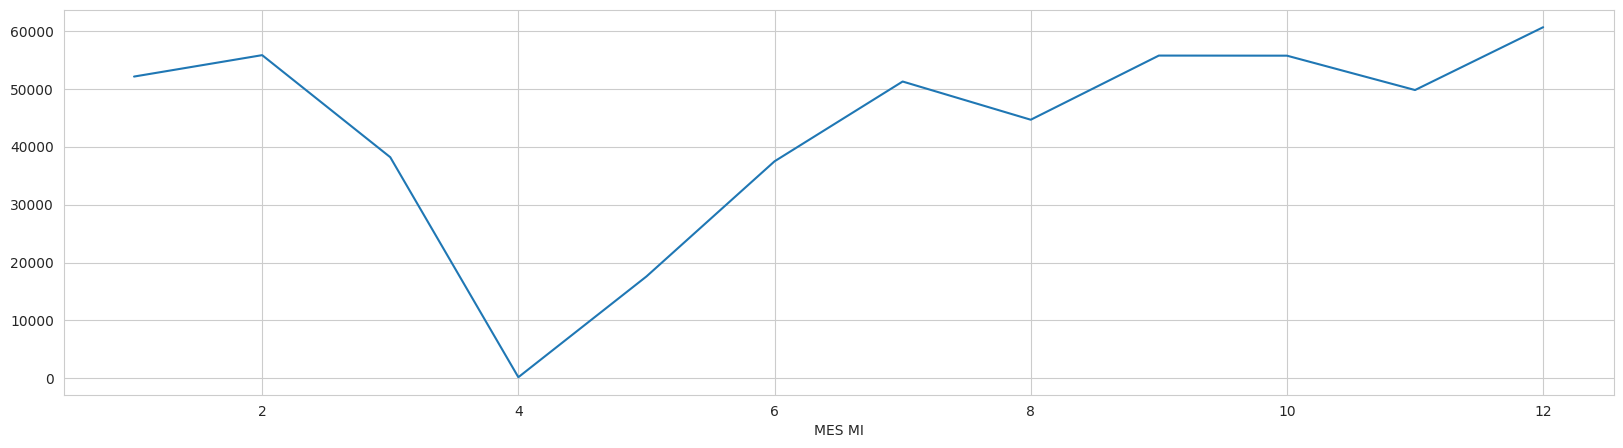

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria = co20.groupby('MES MI').count()['MATRICULA']
 
count_categoria.plot(ax = ax)
plt.show()

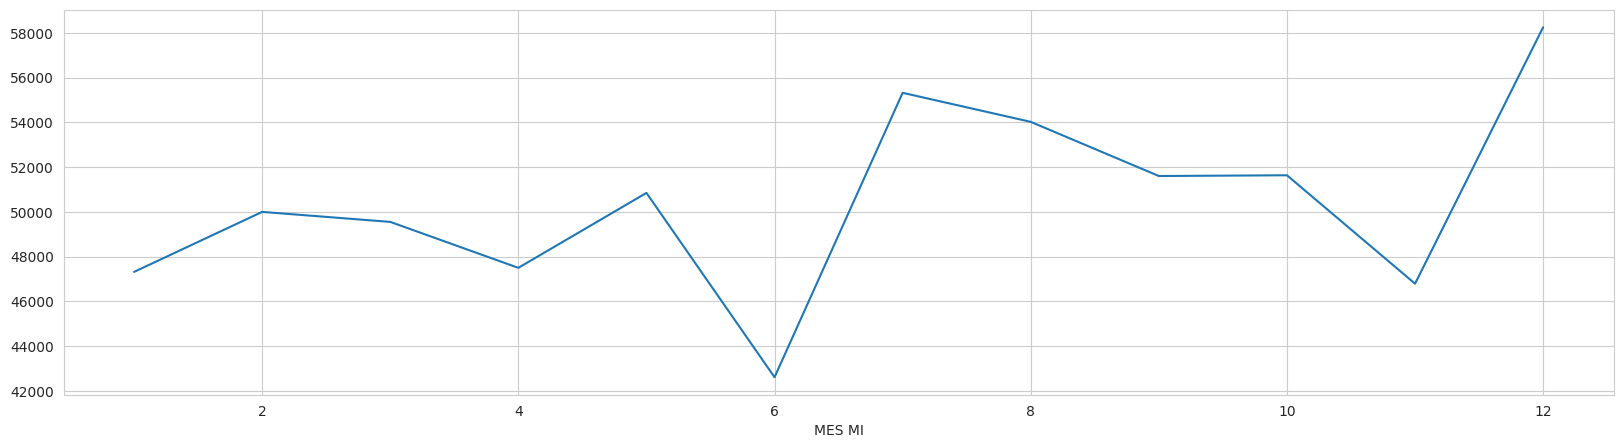

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
count_categoria = co19.groupby('MES MI').count()['MATRICULA']
 
count_categoria.plot(ax = ax)
plt.show()

## Analisis general del mercado

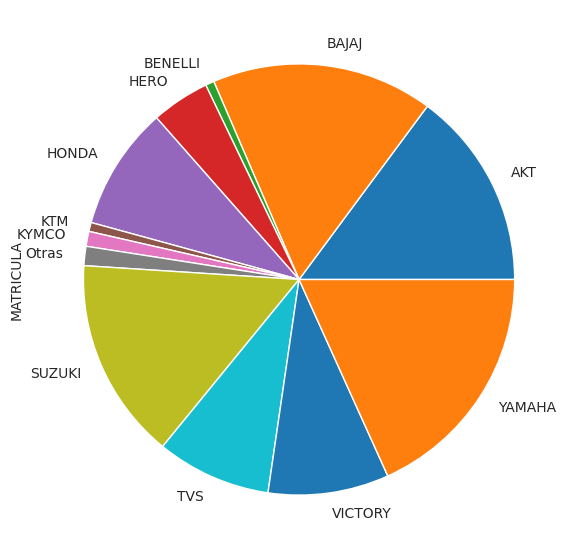

In [ ]:
datos = co.groupby('MARCA COMERCIAL').count()['MATRICULA']
fig,ax= plt.subplots(figsize = (10,7))
datos.plot.pie()
plt.show()

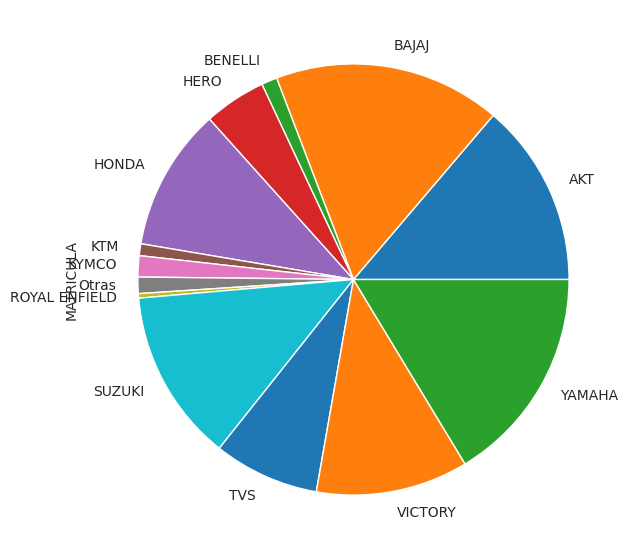

In [ ]:
datos = co22.groupby('MARCA COMERCIAL').count()['MATRICULA']
fig,ax= plt.subplots(figsize = (10,7))
datos.plot.pie()
plt.show()

Analisis: En este grafico de pie se observa que la mayor parte del mercado lo tiene Bajaj y Yamaha, las marcas lideres en ventas del mercado, seguidas por AKT, Suzuki y Honda.

<Axes: xlabel='MES MI'>

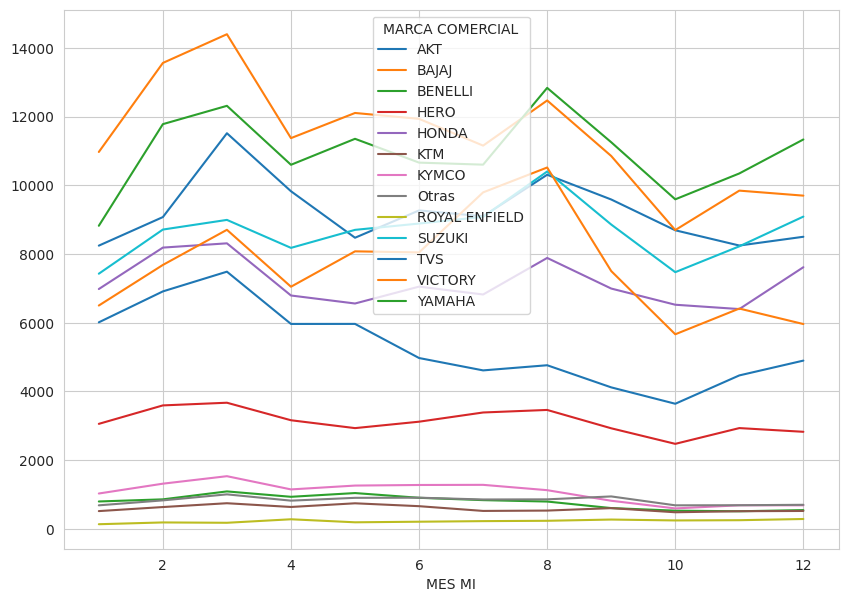

In [ ]:
tabla = co22.groupby([pd.Grouper(key='MES MI'), 'MARCA COMERCIAL']).size().unstack()
fig, ax= plt.subplots(figsize = (10,7))
df_marcas = tabla.groupby('MES MI').sum()
df_marcas.plot(kind='line', ax = ax)

Analisis: A principios de año Bajaj tenía el liderazgo indiscutible del mercado, pero a finales se puede observar como Yamaha lo supera, ubicandose en el primer lugar. De forma similar se puede observar como AKT supera a AKT y toma el tercer lugar en diciembre. 

<Axes: >

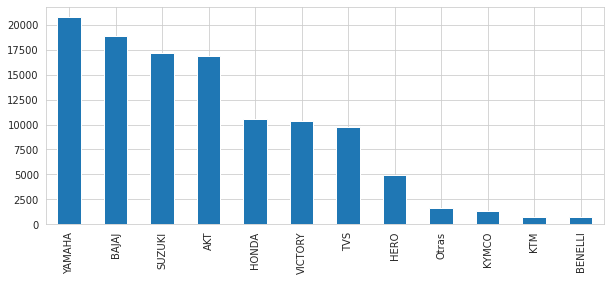

In [ ]:
fig, ax= plt.subplots(figsize = (10,4))
co['MARCA COMERCIAL'].value_counts().plot.bar(ax = ax)

Analisis: en el 2022, el TOP 3 de marcas que más vendiron motos en Colombia fueron Bajaj, Yamaha y AKT. 

In [ ]:
co['MARCA COMERCIAL'].value_counts()


YAMAHA     20793
BAJAJ      18936
SUZUKI     17231
AKT        16928
HONDA      10535
VICTORY    10320
TVS         9797
HERO        4987
Otras       1643
KYMCO       1275
KTM          767
BENELLI      738
Name: MARCA COMERCIAL, dtype: int64

## Analisis temporal de las marcas

<Axes: xlabel='MARCA COMERCIAL', ylabel='DIA MI'>

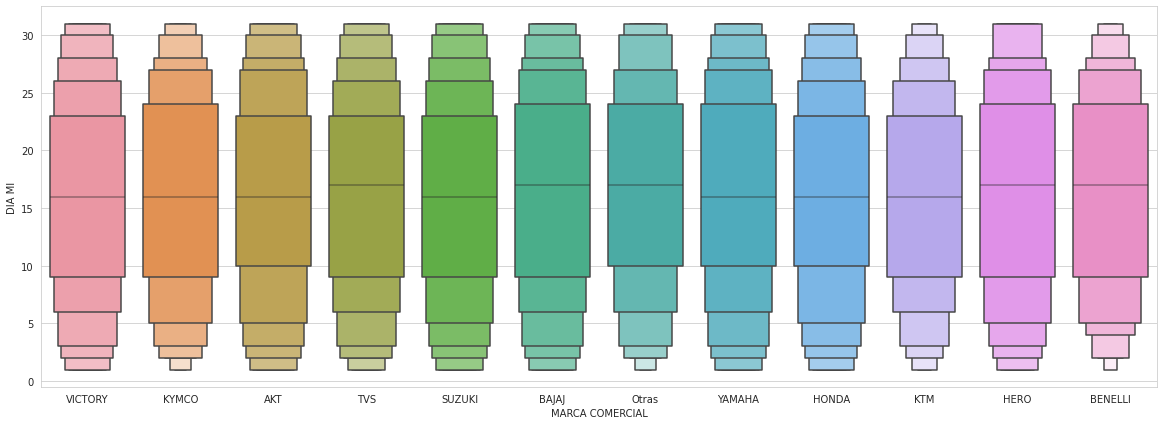

In [ ]:
fig, ax= plt.subplots(figsize = (20,7))
sns.boxenplot(data=co, x='MARCA COMERCIAL', y="DIA MI", scale="linear")

Al revisar la distrubión de los datos por dia, en el 2023, se puede observar que en general las marcas realizan la mayoría de sus matriculas después del 15 del mes. En particular llama la atención los quertiles superiores de hero, que muestran que la marca tiene una mayor proporción de sus ventas a final de mes frente a otras marcas. 

<Axes: xlabel='MARCA COMERCIAL', ylabel='DIA MI'>

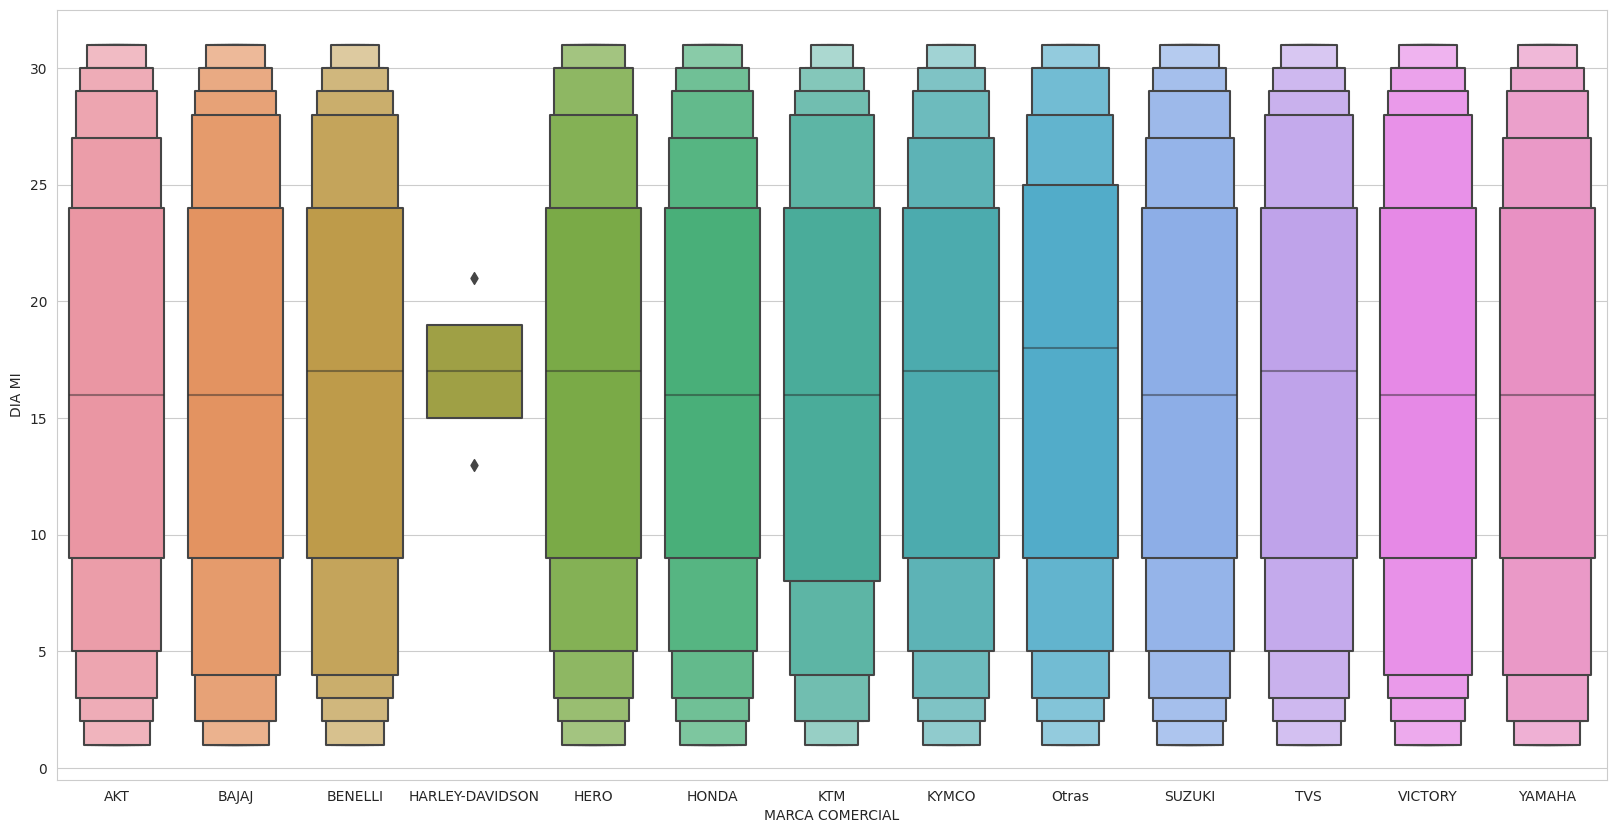

In [ ]:
fig, ax= plt.subplots(figsize = (20,10))
sns.boxenplot(data=co21, x='MARCA COMERCIAL', y="DIA MI", scale="linear")

<Axes: xlabel='MARCA COMERCIAL', ylabel='DIA MI'>

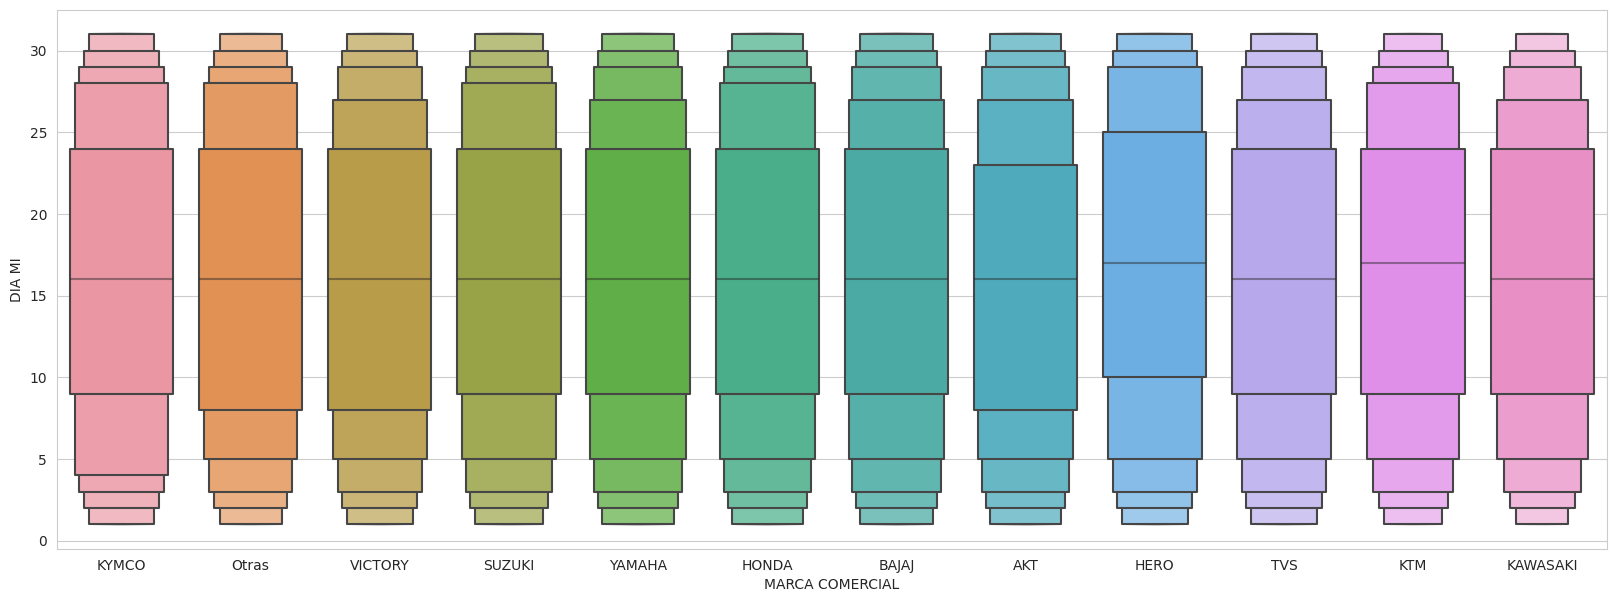

In [ ]:
fig, ax= plt.subplots(figsize = (20,7))
sns.boxenplot(data=co19, x='MARCA COMERCIAL', y="DIA MI", scale="linear")

<Axes: xlabel='MARCA COMERCIAL', ylabel='DIA MI'>

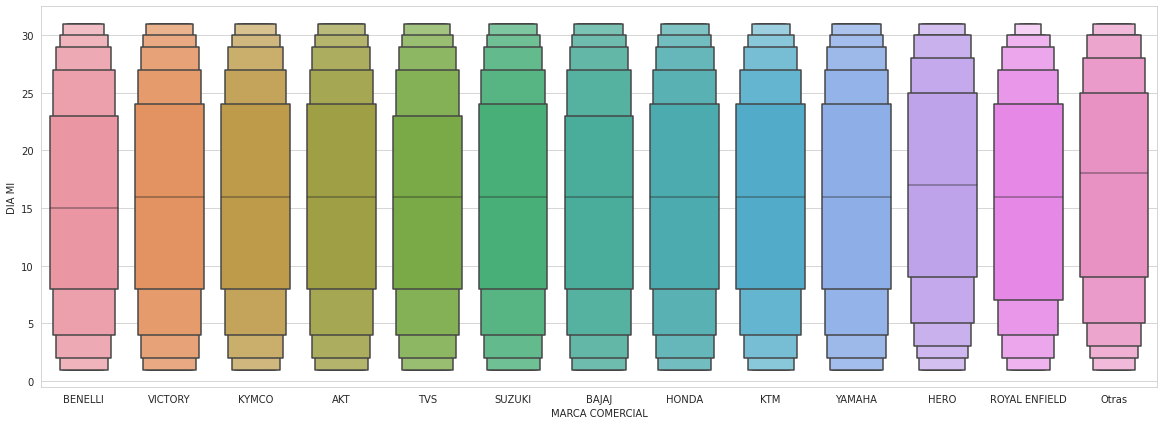

In [ ]:
fig, ax= plt.subplots(figsize = (20,7))
sns.boxenplot(data=co22, x='MARCA COMERCIAL', y="DIA MI", scale="linear")

para entender mejor el panoprama, analizamos el año anterior. Un mayor marco de tiempo permite observar mejor el comportamiento de los datos.

Benelli es la unica marca que parece tener una distribución alineada al mes, mientras que als demás marcas tienden a matricular después del 15. 

Hero nuevamente resalta, su mediana está por encima de las demás marcas, nostrando que la mayoría de ventas se registran a finales del mes en comparación a los demás.  

## Analisis de marca por geografias

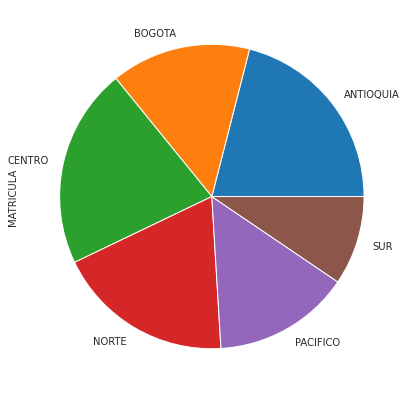

In [ ]:
datos2 = co.groupby('NUEVAS ZONAS').count()['MATRICULA']
fig,ax= plt.subplots(figsize = (10,7))
datos2.plot.pie()
plt.show()

Analisis: La zona centro es la mas representativa en cuanto a la venda de motos, seguida por Antioquia y Centro en tercer lugar. 

En este punto se empieza a evidenciar que viertas zonas del pais tienen mayor concentracion de las ventas

<Axes: >

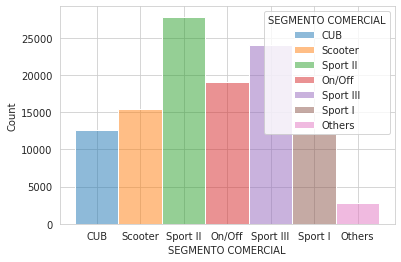

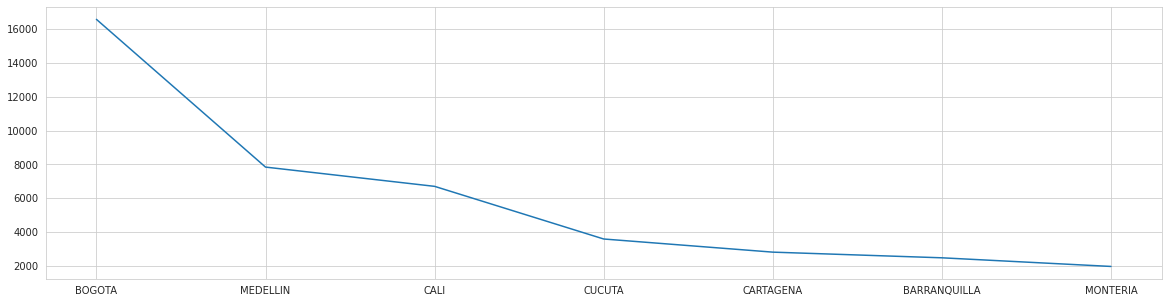

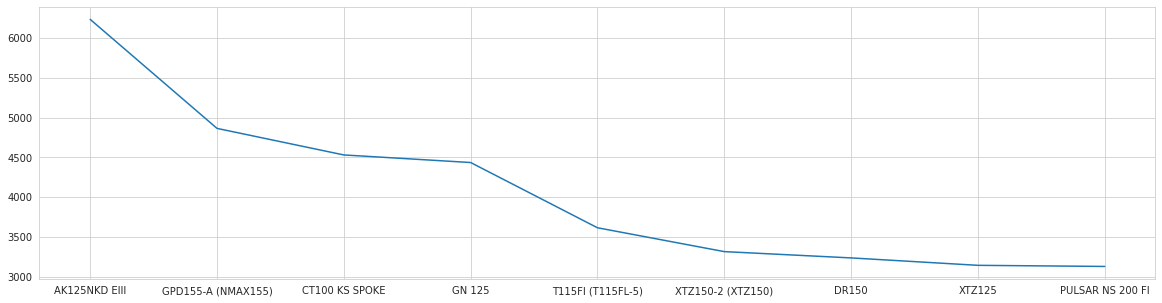

In [ ]:
sns.set_style("whitegrid")
sns.histplot(data=co, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Market_Top_town = co['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Market_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Market_Top_models = co['LINEA'].value_counts()[:9]
Market_Top_models.plot(ax = ax)

Las ciudaes más representativas del mercado son Bogotá (Capital de Colombia), Medelin, Cali, Cucuta, Cartagena, Barrranquilla y Monteria. 

A nivel de modelos (referencias de motocicletas), la Más vendida en Colombia es la NKD125 de AKT, seguida porla Nmax de Yamaha y la Boxer CT100 de Bajaj. De estos tres modelos resalta la Nmax, una motocicleta con un precio mucho mnayor a las otras dos, y sin embargo maneja los mismos volúmenes de una de las motos más economicas del mercado, la Boxer CT100
 

<Axes: >

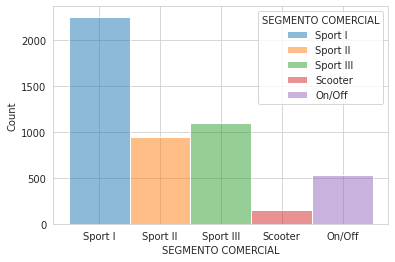

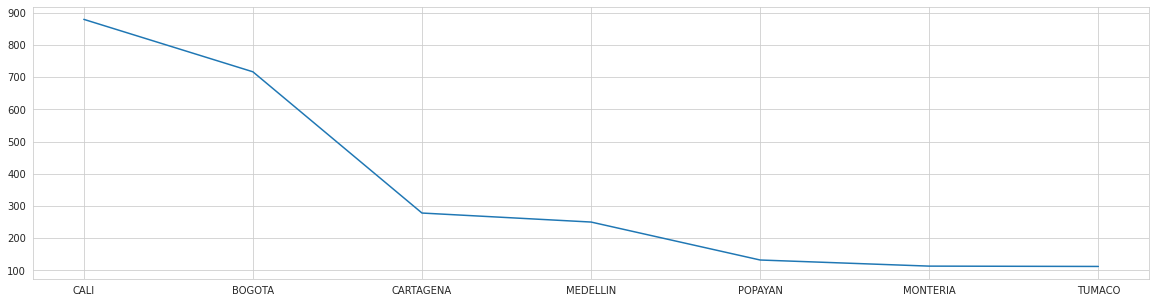

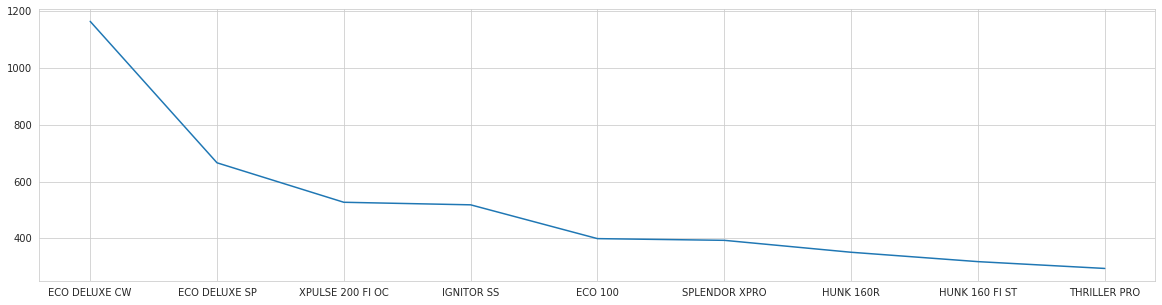

In [ ]:
Hero_sales = co.query("MARCA == 'HERO'")
sns.set_style("whitegrid")
sns.histplot(data=Hero_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Hero_Top_town = Hero_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Hero_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Hero_Top_models = Hero_sales['LINEA'].value_counts()[:9]
Hero_Top_models.plot(ax = ax)


La marca Hero tiene la mayoría de sus ventas en el segmento Sport I, el más económico del mercado (motos de trabajo). A nivel de ciudad se observa que, a diferencia del mercado, Cali es la ciudad más importante para esta marca, seguida por Bogotá (la que más motos vende en el mercado). 

Los modelos más representativos para la marca son la Eco Deluxe en sus dos versiones (CW, SP), seguido por la Xpulse 200 y la Ignitor que estan en el mismo nivel de ventas

<Axes: >

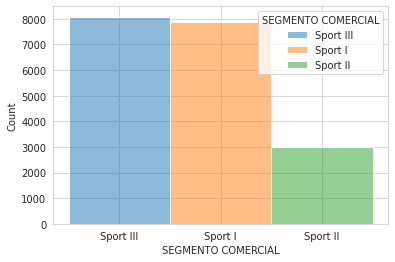

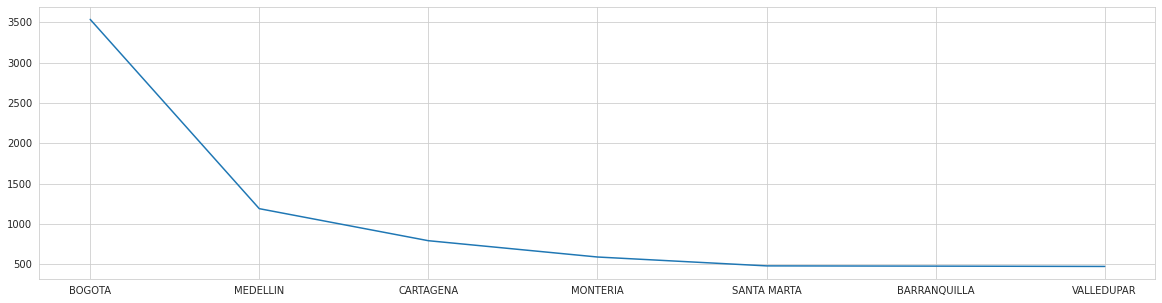

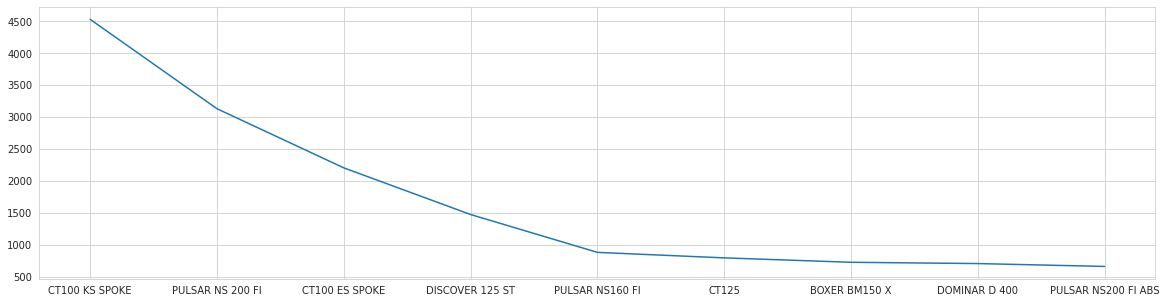

In [ ]:
Bajaj_sales = co.query("MARCA == 'BAJAJ'")

sns.histplot(data=Bajaj_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Bajaj_Top_town = Bajaj_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Bajaj_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Bajaj_Top_models = Bajaj_sales['LINEA'].value_counts()[:9]
Bajaj_Top_models.plot(ax = ax)

Bajaj, la marca lider de mercado tiene motos en solo 3 segmentos. El segmento Sport I es donde mas motos vende, con sus modelos de 100CC, (Boxer) seguido por sus modelos Sport III, prinicipalmente en el ilindraje de 200cc.

Los modelos más representativos de Bajaj son la Ct100 KS, seguido por la Pulsar 200 y la CT100 ES. 

El top 5 de ciudades donde mas se venden motocicletas son Bogota, Medellin,Cartagena y Montería. De sus 7 ciudades más improtantes, 5 estan en la zona norte (Costa) del país.

<Axes: >

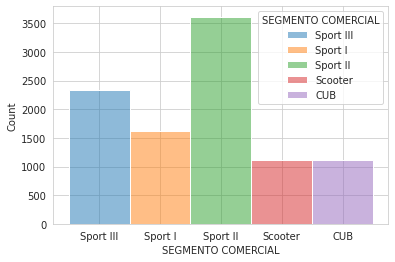

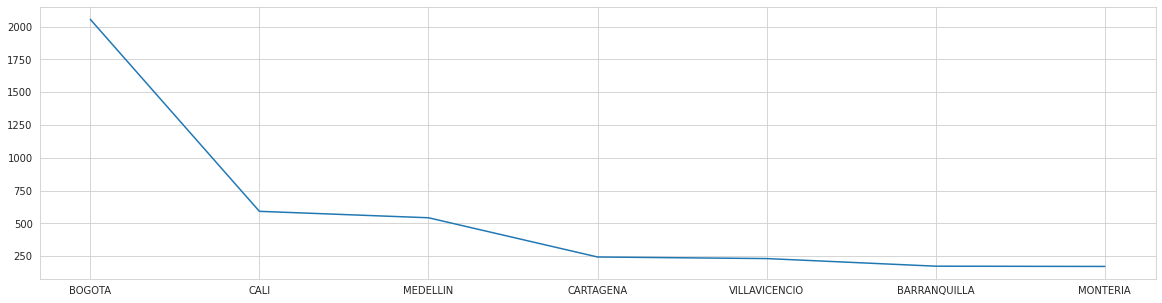

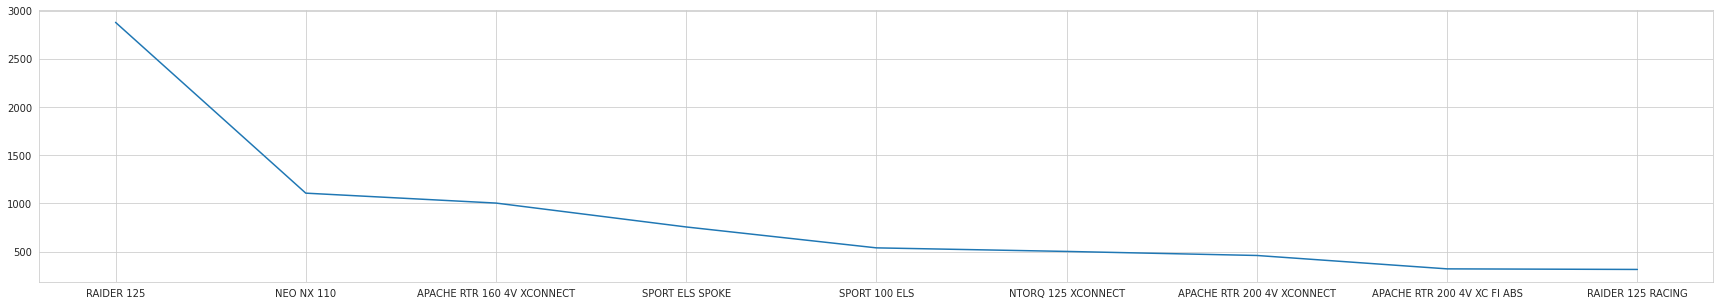

In [ ]:
Tvs_sales = co.query("MARCA == 'TVS'")

sns.histplot(data=Tvs_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Tvs_Top_town = Tvs_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Tvs_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (30,5))
Tvs_Top_models = Tvs_sales['LINEA'].value_counts()[:9]
Tvs_Top_models.plot(ax = ax)

TVS es una marca con una gran participación en el segmento Sport II, gracias al resultado de la Raider 125 (su motocicleta más vendida actualmente). 

a nivel de ventas por ciudad se observa que Bogotá es su plaza más importante, seguida por Cali y Medellín, las tres ciudades más importantes a nivel de mercado.

<Axes: >

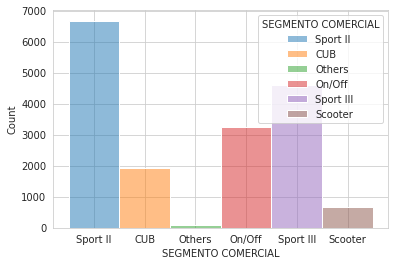

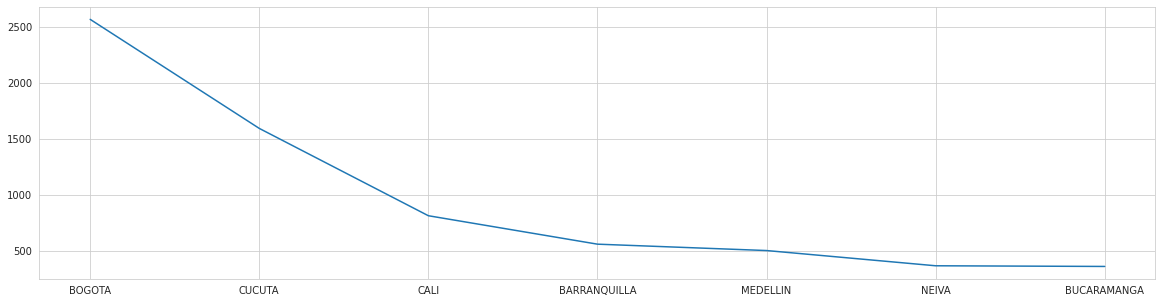

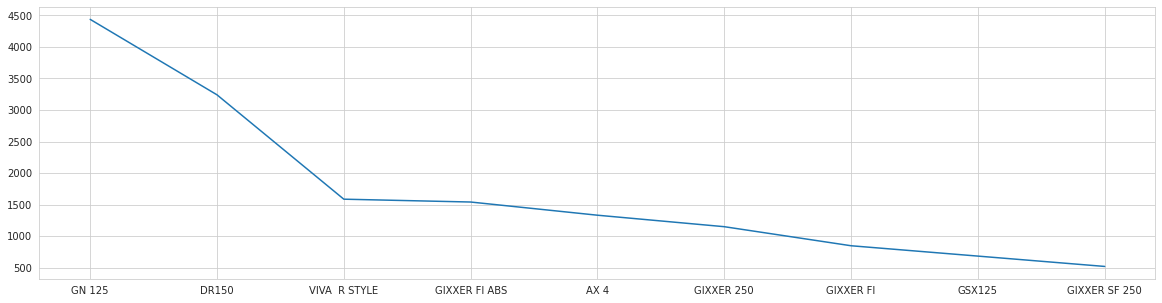

In [ ]:
Suzuki_sales = co.query("MARCA == 'SUZUKI'")

sns.histplot(data=Suzuki_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Suzuki_Top_town = Suzuki_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Suzuki_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Suzuki_Top_models = Suzuki_sales['LINEA'].value_counts()[:9]
Suzuki_Top_models.plot(ax = ax)

Suzuki tiene una gran distribución de ventas en Bogotá y, a diferencia de las otras marcas, tiene una gran particiáción en Cúcuta. 

Las ventas de esta marca se concentran en 2 modelos principales: La GN125 y la DR150 de los segmentos Sport II y On-Off.

<Axes: >

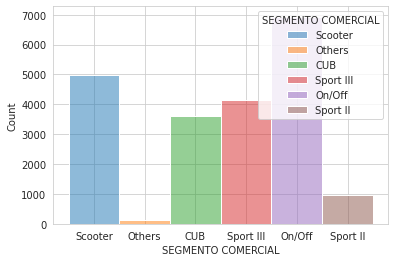

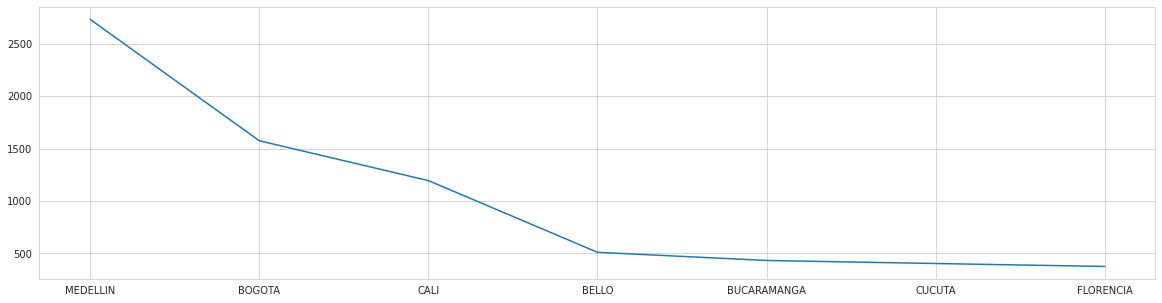

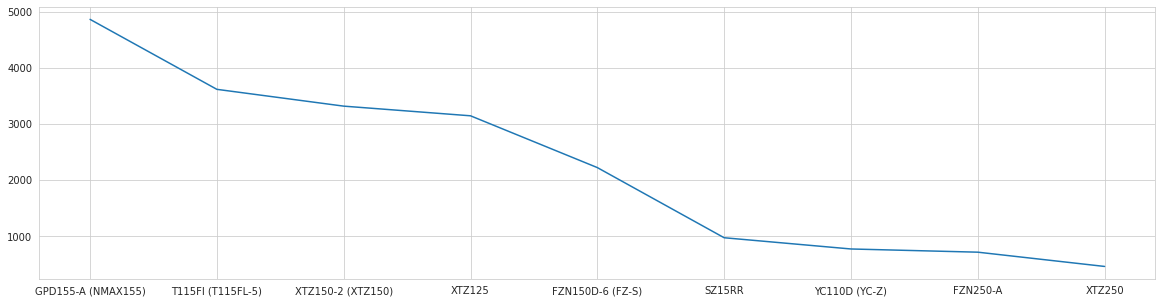

In [ ]:
Yamaha_sales = co.query("MARCA == 'YAMAHA'")

sns.histplot(data=Yamaha_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Yamaha_Top_town = Yamaha_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Yamaha_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Yamaha_Top_models = Yamaha_sales['LINEA'].value_counts()[:9]
Yamaha_Top_models.plot(ax = ax)

Yamaha, la marca líder del mercado este año cuenta con particiáción en todos los segmentos. Medellin es su plaza más improtante, seguida por Bogota y Cali. Los tres modelos más relevantes osn la Nmax, la T115 Fi y las XTZ (150 & 125). 

<Axes: >

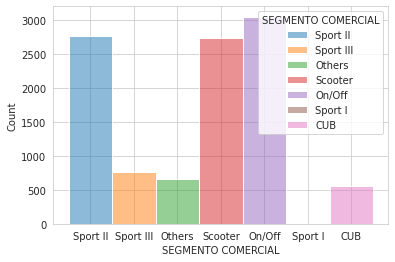

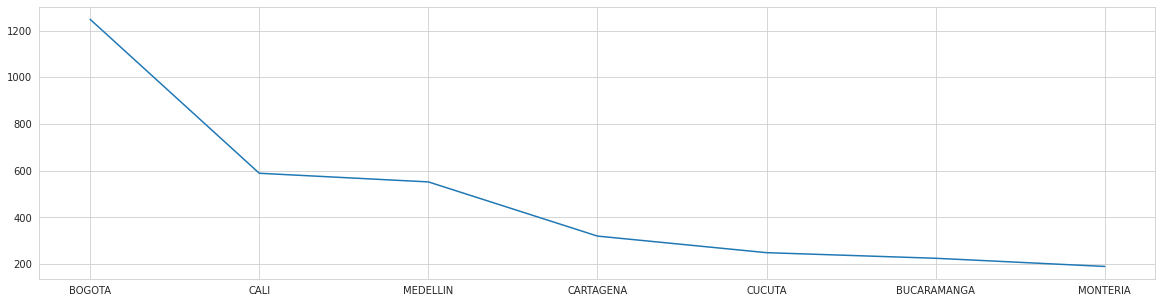

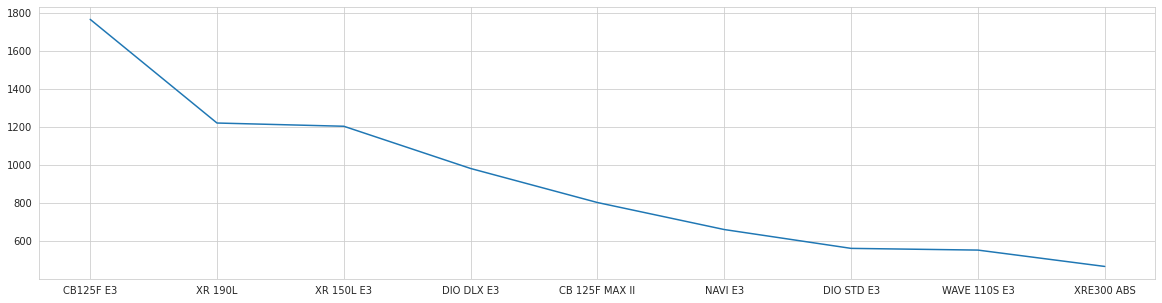

In [ ]:
Honda_sales = co.query("MARCA == 'HONDA'")

sns.histplot(data=Honda_sales, x='SEGMENTO COMERCIAL',hue='SEGMENTO COMERCIAL')

fig, ax = plt.subplots(figsize = (20,5))
Honda_Top_town = Honda_sales['CIUDAD RESIDENCIA PROPIETARIO'].value_counts()[:7]
Honda_Top_town.plot(ax = ax)

fig, ax = plt.subplots(figsize = (20,5))
Honda_Top_models = Honda_sales['LINEA'].value_counts()[:9]
Honda_Top_models.plot(ax = ax)

Honda tiene presencia importante en tres segmentos: Sport II, On/Off y Scooter. La principal ciudad de ventas es Bogota, seguida por Cali y Medellin y su principal modelo es la CB125. Las XR (190 y 150) ocupan el segundo y tercer lugar en las ventas de la marca.

##Segmentos:

<Axes: xlabel='count', ylabel='SEGMENTO COMERCIAL'>

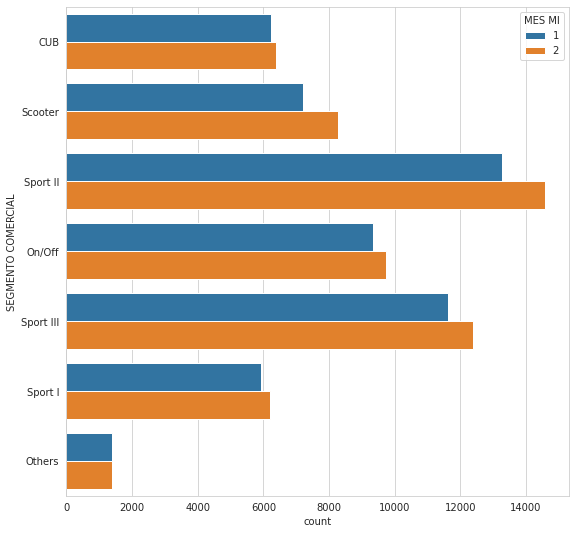

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.countplot(y= co['SEGMENTO COMERCIAL'], hue = co['MES MI'],ax = ax)

Analisis: En lo que va del año se puede observar que los segmentos Sport II y Sport III son los más representativos en ventas. En febrero se observa un incremetno en las ventas de la mayoría de segmentos, a excepción de CUB y Sport I que mantienen volumenes muy cercanos a los del mes pasado. 

Como complemento, quiero resaltar que estos dos segmentos son los más económicos del mercado, lo que refleja la situación económica complciada para los usuarios que buscan motos más baratas. 


<Axes: xlabel='SEGMENTO COMERCIAL', ylabel='DIA MI'>

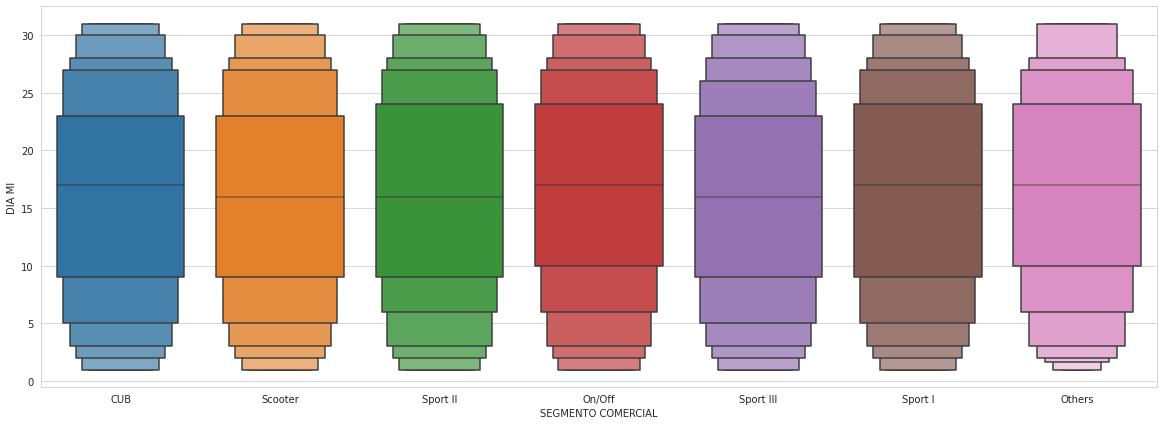

In [ ]:
fig, ax= plt.subplots(figsize = (20,7))
sns.boxenplot(data=co, x='SEGMENTO COMERCIAL', y="DIA MI", scale="linear")

En este gráfico se puede observar la distribución por dias de las ventas por segmento, y permite entender si algun segmento tiene alguna distribución diferente en el mes. De manera preliminar se puede observar que el segmento Sport I parece tener concentrada la mayorúa de sus ventas un poco más hacia el final del mes que el resto de segmentos, al igual que las motocicletas on/Off y las CUB.

# Conclusiones

En primer lugar se puede observar que las ventas no ocurren todos los días, además, se evidencia que durante los últimos 10 días del mes se venden más motos en comparación con los primeros 20 días, lo que sugiere la necesidad de implementar acciones específicas de ventas y marketing para esos días.

En cuanto a los segmentos de mercado, se destaca que los segmentos Sport II y Sport III son los más representativos en ventas, mientras que los segmentos CUB y Sport I mantienen volúmenes cercanos. Estos dos últimos son los segmentos más económicos del mercado, lo que sugiere una situación económica difícil para los consumidores que buscan motocicletas más baratas.

En términos de las marcas más importantes, Yamaha y Bajaj lideran el mercado, seguidas por AKT, Suzuki y Honda. Las ciudades más representativas del mercado son Bogotá, Medellín, Cali, Cúcuta, Cartagena, Barranquilla y Montería. Además, la AKT NKD125 es la motocicleta más vendida en Colombia, seguida por la Yamaha Nmax y la Bajaj Boxer CT100.

Cada marca tiene una presencia diferencial en diferentes segmentos de mercado y ciudades. Por ejemplo, la marca Hero tiene la mayoría de sus ventas en el segmento Sport I, el más económico del mercado, y en la ciudad de Cali. En contraste, Suzuki tiene una gran distribución de ventas en Bogotá y Cúcuta, mientras que Yamaha tiene una participación en todos los segmentos y una plaza más importante en Medellín. 

En cuanto a la distribución geográfica, se destaca que la zona Bogota (centro) es la más representativa en cuanto a la venta de motocicletas, seguida por Antioquia (Donde está Medellín). 

En resumen, el análisis de los datos permite observar las tendencias del mercado de motocicletas en Colombia, las preferencias de los consumidores y las estrategias que podrían aplicar las empresas para mejorar sus ventas. Es importante tener en cuenta las diferencias geográficas, los segmentos de mercado y los modelos más populares para adaptar las estrategias de marketing y ventas a las necesidades del mercado.